In [1]:
import spherical_functions as sf
# import quaternion
# from scipy.special import lpmn as pl
from scipy.special import eval_legendre as pl
from multiprocessing import Pool,cpu_count
from functools import partial
import mpmath

from scipy.special import poch,hyp2f1,gamma,loggamma

from scipy.special import binom,jn,loggamma
#from scipy.special import hyp2f1 as h21
from scipy.special import eval_jacobi as jacobi

from sympy.physics.wigner import wigner_3j
import sparse

from sympy import Integer
from sympy import sqrt as sy_sqrt
from sympy import exp as sy_exp
from sympy import log as sy_log

from mpmath import exp as mp_exp
from mpmath import log as mp_log

In [2]:
from sympy import log as sy_log
from sympy import exp as sy_exp

In [3]:
%time x=wigner_3j(1000,1000,100,0,0,0)

CPU times: user 130 ms, sys: 5 µs, total: 130 ms
Wall time: 130 ms


In [122]:
def hyper2f1(a,b,c,z):
    h=loggamma(c)-loggamma(b)-loggamma(c-b)
    
    t=np.linspace(0,1,1000)
    dt=np.gradient(t)
    
    i_log=t*(b-1.)
    i_log+=(1.-t)*(c-b-1)
    i_log-=(1.-t*z)*a
    i=np.exp(i_log)
    h+=np.log(np.sum(i*dt))
    print(h)
    return np.exp(h)

In [123]:
n=1
# n=np.arange(1.e4,1.001e4)
a=1
b=4
z=0.9
print(hyp2f1(n,a,b,z))
print(hyper2f1(n,a,b,z))

# %time print (hyp2f1(-n,1.+a+b+n, 1+a, z))
# %time print (hyp2f1(1+a+n,b+n, 1+a, z))
# %time print (hyp2f1(-n,1.+a+b+n, 1+a, 1-z))
# %time print (hyp2f1(-n,1.+a+b+n, 1+a, z/(z-1)))
# %time print (mpmath.hyp2f1(-n,1.+a+b+n, 1+a, z,maxprec=10**30))
# %time print (hyper2f1(-n,1.+a+b+n, 1+a, z))

1.3910528844853505
1.5996295880322284
4.951198101656879


In [124]:
def jacobi2(a,b,cos_theta,l):
    j=jacobi(l,a,b,cos_theta)
    print (j.shape,l,a,cos_theta.shape)
    return 


def log_factorial(n):
    return loggamma(n+1)

def log_binom(n,k):
    if k>n:
        return 0
    return log_factorial(n)-log_factorial(k)-log_factorial(n-k)

def wigner_d(m1,m2,theta,l,l_use_bessel=1.e4):
    l0=np.copy(l)
    if l_use_bessel is not None:
        l=np.atleast_1d(l)
        x=l<l_use_bessel
        l=np.atleast_1d(l[x])
    k=np.amin([l-m1,l-m2,l+m1,l+m2],axis=0)
    a=np.absolute(m1-m2)
    lamb=0 #lambda
    if m2>m1:
        lamb=m2-m1
    b=2*l-2*k-a
    d_mat=(-1)**lamb
    d_mat*=np.sqrt(binom(2*l-k,k+a)) #this gives array of shape l with elements choose(2l[i]-k[i], k[i]+a)
#     print(binom(2*l-k,k+a),binom(k+b,b))
    d_mat/=np.sqrt(binom(k+b,b))
#     bt=log_binom(2*l-k,k+a)-log_binom(k+b,b)
#     bt*=0.5
#     d_mat=np.exp(bt)
#     print(d_mat,bt)

    d_mat=np.atleast_1d(d_mat)
    x=k<0
    d_mat[x]=0
    d_mat=d_mat.reshape(1,len(d_mat))
    theta=theta.reshape(len(theta),1)
    d_mat=d_mat*((np.sin(theta/2.0)**a)*(np.cos(theta/2.0)**b))
    d_mat*=jacobi(l,a,b,np.cos(theta))
#     print(jacobi(l,a,b,np.cos(theta)))
    if l_use_bessel is not None:
        l=np.atleast_1d(l0)
        x=l>=l_use_bessel
        l=np.atleast_1d(l[x])
#         print(d_mat.shape,jn(m1-m2,l*theta).shape)
        d_mat=np.append(d_mat,jn(m1-m2,l*theta),axis=1)
#         crash
#     x2=np.isnan(d_mat)
#     x=np.where(x2)
#     l=np.atleast_1d(l)
#     d_mat[x2]=jn(m1-m2,l[x[1]]*theta[x[0],0])
    
    return d_mat        

In [125]:
wigner_d(j1-j3,m1,np.atleast_1d(np.pi/2),j2,)#l_use_bessel=100)

NameError: name 'j1' is not defined

In [126]:
l=np.arange(1e4,1.1e4)#+1000
m1=2
m2=2
d2r=np.pi/180.
theta=np.linspace(0.1,5,20)*d2r

In [127]:
theta[0]

0.0017453292519943296

In [128]:
j0=jn(4,l*theta[1])
j2=jn(2,l*theta[2])

/usr/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


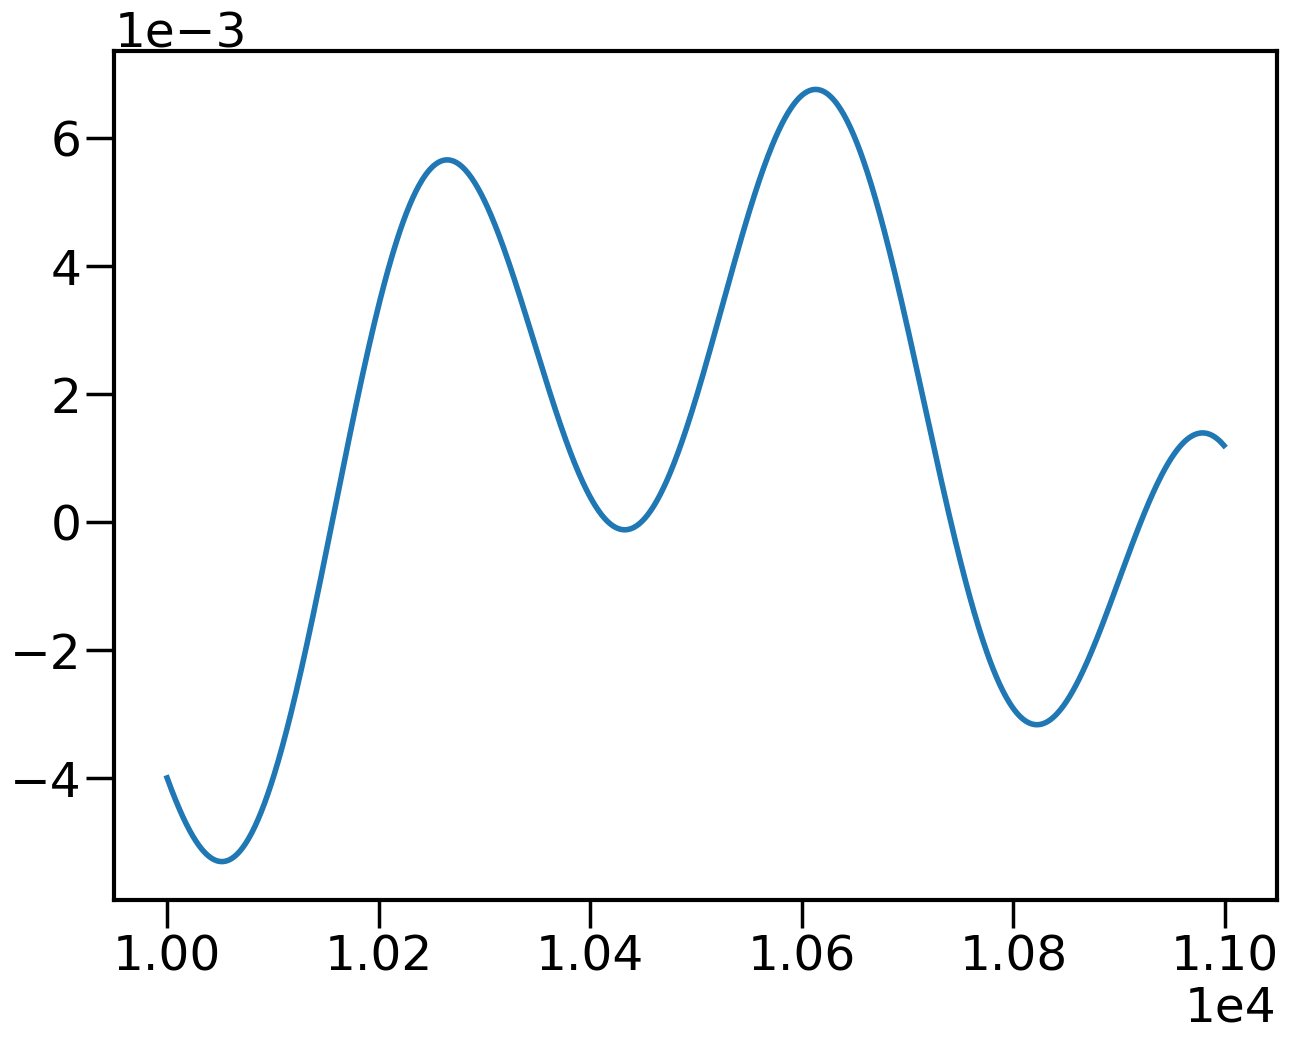

In [129]:
plot(l,j0*j2)

In [209]:
l=np.arange(1e4)
dm=wigner_d(2,2,np.atleast_1d(theta[1]),l)
dm2=wigner_d(0,2,np.atleast_1d(theta[1]),l)
(dm[0]*sqrt(2*l+1)).sum()

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide


-749.241686792393

/usr/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


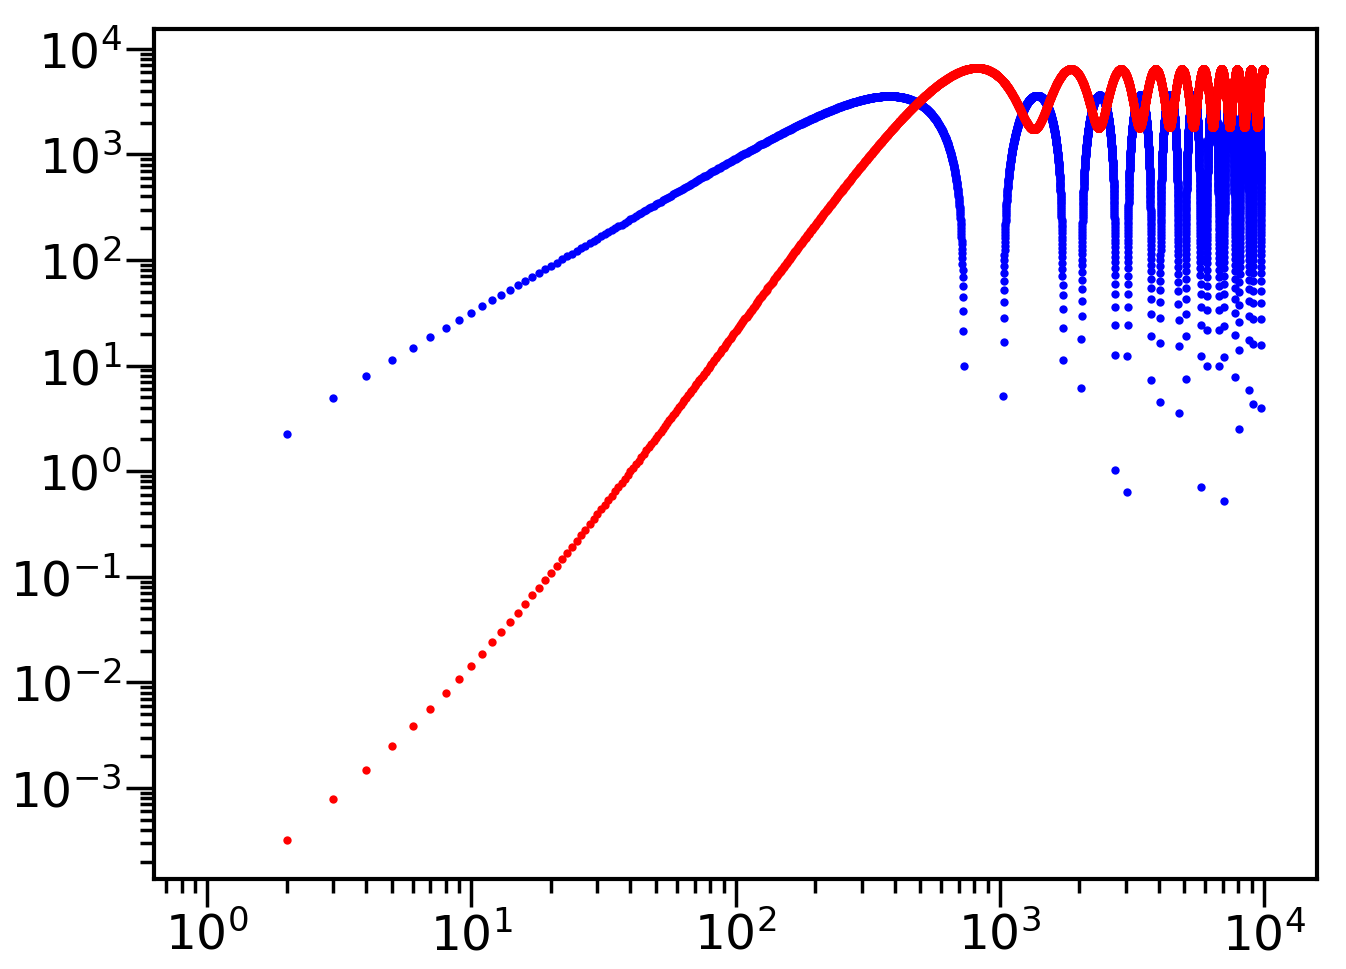

In [210]:
y=dm[0]*sqrt(2*l+1)
y02=np.cumsum(y)

y2=dm2[0]*sqrt(2*l+1)
y22=np.cumsum(y2)


plot(l,y02,'b.')
plot(l,y22,'r.')
xscale('log')
yscale('log')

/usr/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


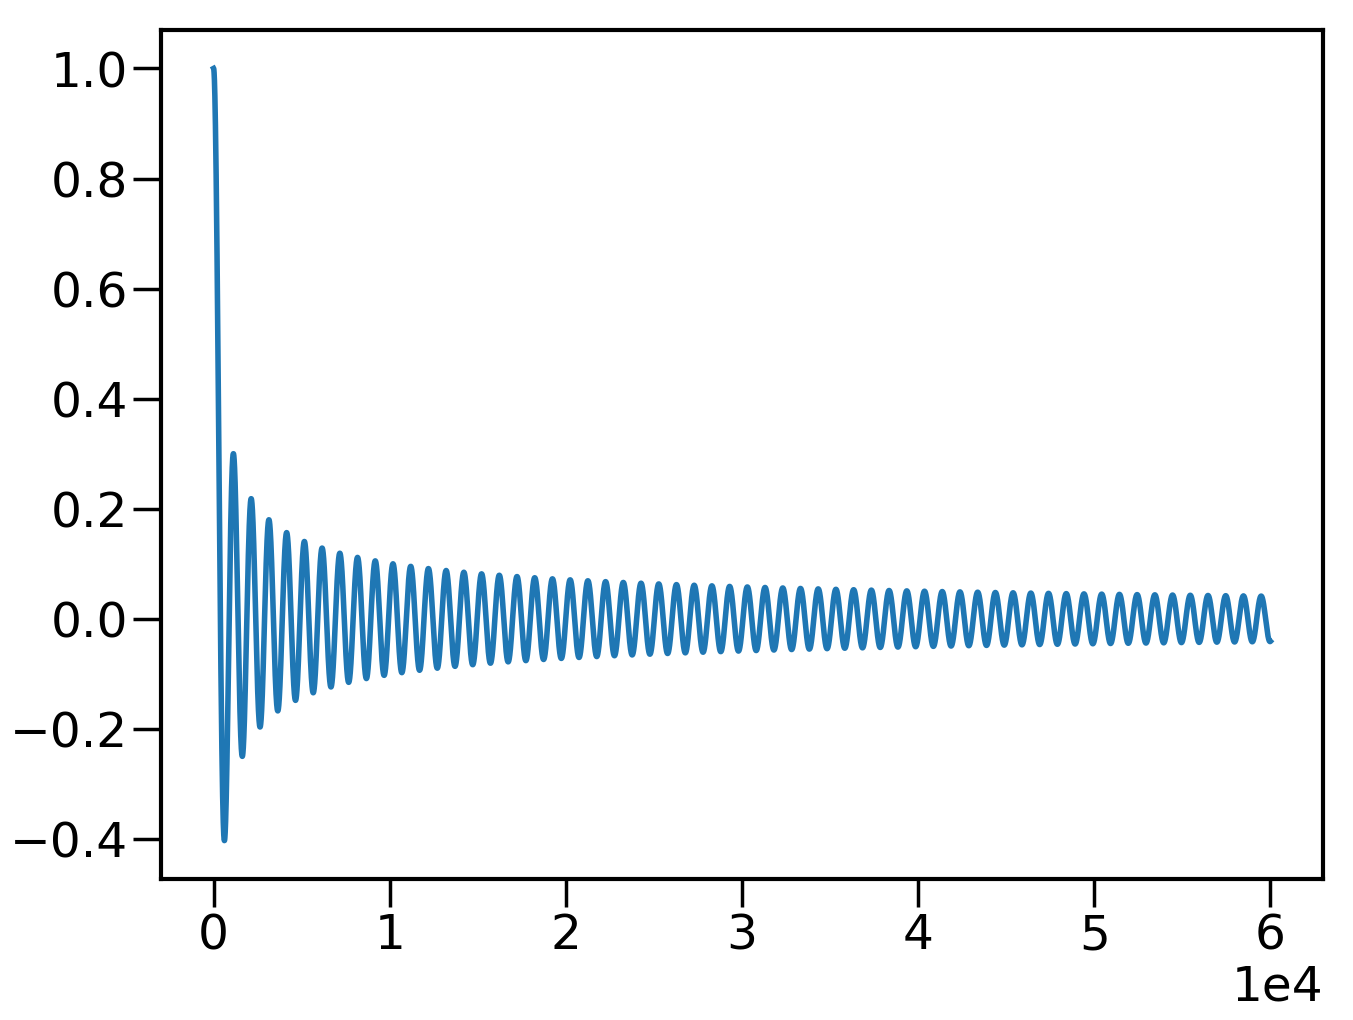

In [137]:
plot(l,dm[0])

In [46]:
dm=wigner_d(m1,m2,theta,np.arange(1.e3,1.001e4))

In [22]:
dm=wigner_d(m1,m2,theta,np.arange(1.e4,1.001e4))

[] []
[]


In [9]:
%time dm=wigner_d(m1,m2,theta,l)

[] []
[]
CPU times: user 16.5 ms, sys: 3.23 ms, total: 19.7 ms
Wall time: 17.1 ms


/usr/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  # This is added back by InteractiveShellApp.init_path()


In [10]:
dm.shape

(20, 1000)

In [11]:
p=Pool(5)
%time dm2=array(p.map(partial(wigner_d,m1,m2,theta,l_use_bessel=1.e4),l))
dm2=dm2[:,:,0].T

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  # This is added back by InteractiveShellApp.init_path()
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  # This is added back by InteractiveShellApp.init_path()
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  # This is added back by InteractiveShellApp.init_path()
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: The truth

[] []
[] []
[] []
[] []
[] []
[]
[]
[]
[]
[]
[] []
[] []
[] []
[] []
[] []
[]
[]
[]
[]
[] []
[] []
[]
[] []
[]
[]
[] []
[] []
[]
[] []
[] []
[]
[]
[] []
[]
[]
[] []
[]
[] []
[] []
[] []
[] []
[]
[]
[]
[]
[]
[] []
[] []
[] []
[]
[] []
[] []
[]
[]
[]
[]
[] []
[] []
[] []
[]
[] []
[] []
[]
[]
[] []
[]
[] []
[]
[] []
[] []
[]
[]
[]
[] []
[]
[] []
[] []
[] []
[]
[] []
[]
[]
[]
[] []
[] []
[] []
[]
[]
[]
[] []
[]
[] []
[]
[] []
[] []
[] []
[] []
[]
[]
[]
[]
[]
[] []
[] []
[] []
[] []
[] []
[]
[]
[]
[]
[]
[] []
[] []
[] []
[] []
[]
[] []
[]
[]
[]
[]
[] []
[] []
[]
[] []
[] []
[] []
[]
[]
[]
[]
[] []
[] []
[] []
[] []
[]
[] []
[]
[] []
[]
[]
[] []
[] []
[]
[] []
[]
[]
[] []
[] []
[]
[] []
[]
[]
[] []
[] []
[]
[] []
[]
[]
[]
[] []
[] []
[] []
[]
[] []
[]
[]
[]
[]
[] []
[] []
[] []
[] []
[]
[]
[] []
[]
[]
[]
[] []
[] []
[] []
[] []
[]
[] []
[]
[]
[]
[] []
[]
[] []
[] []
[] []
[]
[] []
[]
[]
[]
[]
[] []
[] []
[] []
[]
[] []
[]
[] []
[]
[] []
[]
[]
[] []
[] []
[]
[] []
[]
[]
[] []
[] []
[]
[] []
[

In [12]:
dm2.shape

(20, 1000)

In [13]:
np.any(np.isnan(dm2))

False

In [14]:
%time pl0=pl(l,np.cos(theta).reshape(len(theta),1))

CPU times: user 4.55 ms, sys: 2.53 ms, total: 7.08 ms
Wall time: 5.09 ms


/usr/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


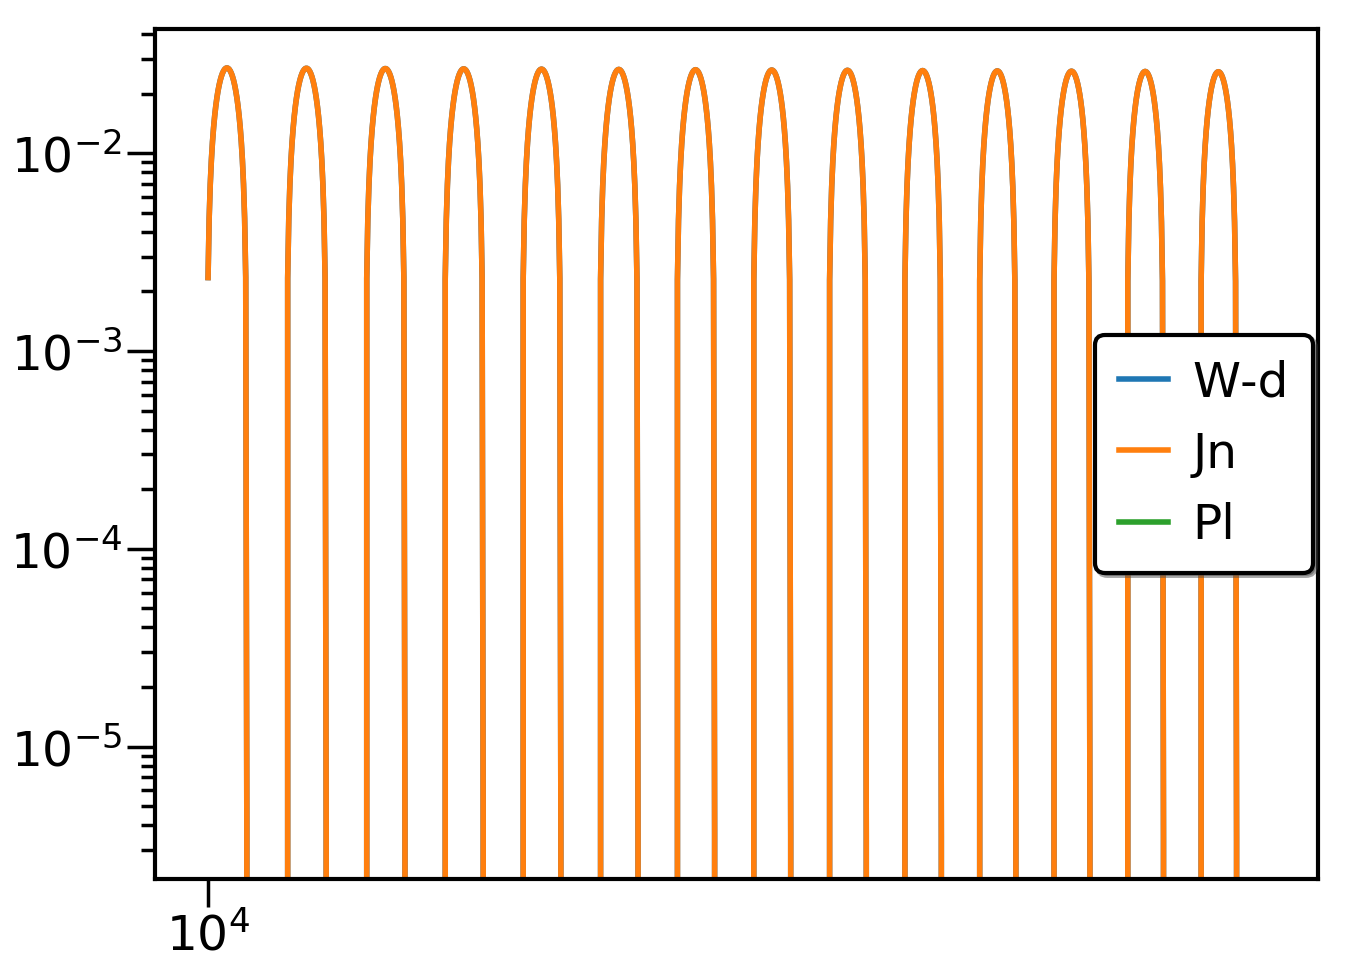

In [15]:
i=-1
plot(l,dm[i],label='W-d')
plot(l,jn(m1-m2,l*theta[i]),label='Jn')
plot(l,pl0[i],label='Pl')
xscale('log')
yscale('log')
legend()
# xlim(655,700)

/usr/lib/python3.7/site-packages/matplotlib/ticker.py:2207: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "
/usr/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


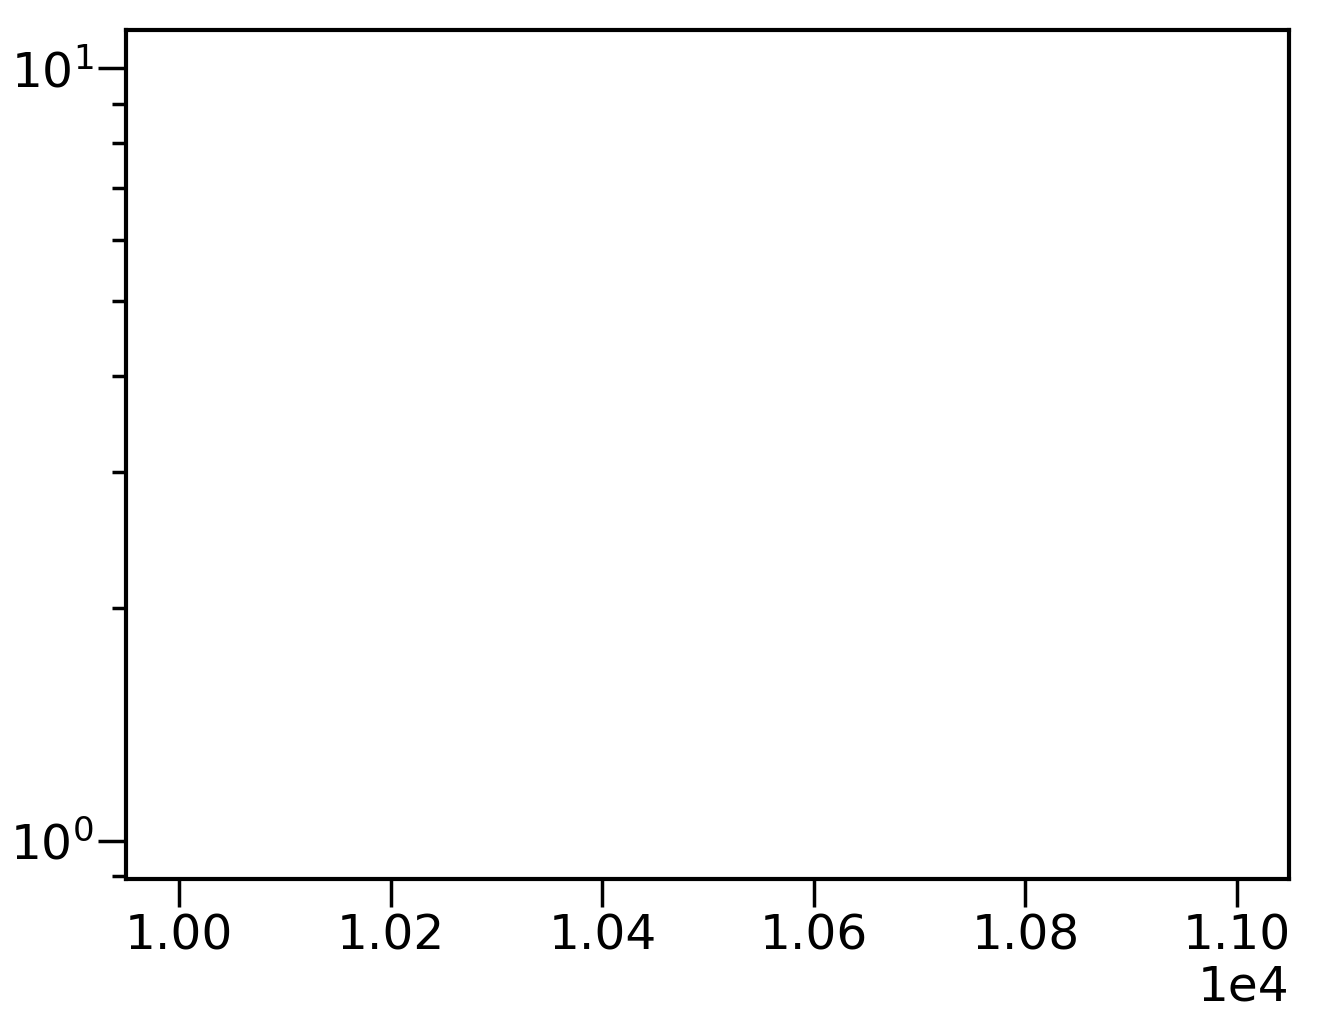

In [16]:
plot(l,dm[i]-jn(m1-m2,l*theta[i]))
# xscale('log')
yscale('log')

In [23]:
from sympy.physics.wigner import wigner_3j
from wigner_functions import *

In [36]:
from sympy.functions.special.gamma_functions import loggamma as sy_loggamma

In [82]:
# def log_factorial(n):
#     return sy_loggamma(n+1)

def log_factorial(n):
    return np.float64(loggamma(n+1))
# #     return np.sum(np.log(np.arange(n)+1))

# log_factorial=np.vectorize(log_factorial2)


In [71]:
j1=1000
j2=1000
j3=1000#999
m1=0
m2=0
m3=0
%time xx2=wigner_3j_2(j1,j2,j3,m1,m2,m3).evalf()



sqrt 1.49030605043838e+6987
4.06599788147480e-6991
CPU times: user 1.07 s, sys: 6 µs, total: 1.07 s
Wall time: 1.06 s


In [83]:
%time XX=Wigner3j_log(j1,j2,j3,m1,m2,m3)
%time xx=wigner_3j(j1,j2,j3,m1,m2,m3).evalf()
# %time xx2=wigner_3j_2(j1,j2,j3,m1,m2,m3).evalf()
XX,xx,xx2

doing full calc
0 1000
1.30015893298462e-6816 1.49030605044502e+6987
CPU times: user 160 ms, sys: 3.33 ms, total: 163 ms
Wall time: 160 ms
CPU times: user 1.08 s, sys: 4 µs, total: 1.08 s
Wall time: 1.08 s


(1.93763472436712e+171, 0.000605958124383152, 0.000605958124383152)

In [80]:
def Wigner3j_log(j_1, j_2, j_3, m_1, m_2, m_3):
    """Calculate the Wigner 3j symbol `Wigner3j(j_1,j_2,j_3,m_1,m_2,m_3)`

    This function is copied with minor modification from
    sympy.physics.Wigner, as written by Jens Rasch.

    The inputs must be integers.  (Half integer arguments are
    sacrificed so that we can use numba.)  Nonzero return quantities
    only occur when the `j`s obey the triangle inequality (any two
    must add up to be as big as or bigger than the third).

    Examples
    ========

    >>> from spherical_functions import Wigner3j
    >>> Wigner3j(2, 6, 4, 0, 0, 0)
    0.186989398002
    >>> Wigner3j(2, 6, 4, 0, 0, 1)
    0

    """
    if int(j_1 * 2) != j_1 * 2 or int(j_2 * 2) != j_2 * 2 or \
            int(j_3 * 2) != j_3 * 2:
        raise ValueError("j values must be integer or half integer")
    if int(m_1 * 2) != m_1 * 2 or int(m_2 * 2) != m_2 * 2 or \
            int(m_3 * 2) != m_3 * 2:
        raise ValueError("m values must be integer or half integer")
    if m_1 + m_2 + m_3 != 0:
        return 0
    prefid = Integer((-1) ** int(j_1 - j_2 - m_3))
    m_3 = -m_3
    a1 = j_1 + j_2 - j_3
    if a1 < 0:
        return 0
    a2 = j_1 - j_2 + j_3
    if a2 < 0:
        return 0
    a3 = -j_1 + j_2 + j_3
    if a3 < 0:
        return 0
    if (abs(m_1) > j_1) or (abs(m_2) > j_2) or (abs(m_3) > j_3):
        return 0

    print('doing full calc')
    maxfact = max(j_1 + j_2 + j_3 + 1, j_1 + abs(m_1), j_2 + abs(m_2),
                  j_3 + abs(m_3))

    log_argsqrt = ( log_factorial(j_1 + j_2 - j_3) +
                log_factorial(j_1 - j_2 + j_3) +
                log_factorial(-j_1 + j_2 + j_3) +
                log_factorial(j_1 - m_1) +
                log_factorial(j_1 + m_1) +
                log_factorial(j_2 - m_2) +
                log_factorial(j_2 + m_2) +
                log_factorial(j_3 - m_3) +
                log_factorial(j_3 + m_3) ) - log_factorial(j_1 + j_2 + j_3 + 1)
    
    log_ressqrt=0.5*log_argsqrt

    imin = max(-j_3 + j_1 + m_2, -j_3 + j_2 - m_1, 0)
    imax = min(j_2 + m_2, j_1 - m_1, j_1 + j_2 - j_3)
    sumres = 0
    print(imin,imax)
    for ii in range(int(imin), int(imax) + 1):
        log_den = ( log_factorial(ii) +
                log_factorial(ii + j_3 - j_1 - m_2) +
                log_factorial(j_2 + m_2 - ii) +
                log_factorial(j_1 - ii - m_1) +
                log_factorial(ii + j_3 - j_2 + m_1) +
                log_factorial(j_1 + j_2 - j_3 - ii) )

#         log_den = _logFactlist[ii] + \
#             _logFactlist[int(ii + j_3 - j_1 - m_2)] + \
#             _logFactlist[int(j_2 + m_2 - ii)] + \
#             _logFactlist[int(j_1 - ii - m_1)] + \
#             _logFactlist[int(ii + j_3 - j_2 + m_1)] + \
#             _logFactlist[int(j_1 + j_2 - j_3 - ii)]   # doesnt help
        sumres = sumres + Integer((-1) ** ii)/ sy_exp(log_den) #still has numerical errors...works if we use sympy loggamma. But then no speed advantage
#         print(ii,sumres.evalf(),log_den)
    print(sumres.evalf(),sy_exp(log_ressqrt).evalf())
    res = sy_exp(log_ressqrt) * sumres * prefid
    return res #ressqrt taken inside sumres calc

In [74]:
_logFactlist=[1,1]

def _calc_logfactlist(nn):
    r"""
    Function calculates a list of precomputed factorials in order to
    massively accelerate future calculations of the various
    coefficients.

    INPUT:

    -  ``nn`` -  integer, highest factorial to be computed

    OUTPUT:

    list of integers -- the list of precomputed factorials

    EXAMPLES:

    Calculate list of factorials::

        sage: from sage.functions.wigner import _calc_factlist
        sage: _calc_factlist(10)
        [1, 1, 2, 6, 24, 120, 720, 5040, 40320, 362880, 3628800]
    """
    global _logFactlist
    if nn >= len(_logFactlist):
        for ii in range(len(_logFactlist), int(nn + 1)):
            _logFactlist.append(log_factorial(nn))
#     return _Factlist[:int(nn) + 1]
_calc_logfactlist(2000)

In [16]:
_Factlist=[1,1]

In [22]:
def _calc_factlist(nn):
    r"""
    Function calculates a list of precomputed factorials in order to
    massively accelerate future calculations of the various
    coefficients.

    INPUT:

    -  ``nn`` -  integer, highest factorial to be computed

    OUTPUT:

    list of integers -- the list of precomputed factorials

    EXAMPLES:

    Calculate list of factorials::

        sage: from sage.functions.wigner import _calc_factlist
        sage: _calc_factlist(10)
        [1, 1, 2, 6, 24, 120, 720, 5040, 40320, 362880, 3628800]
    """
    global _Factlist
    if nn >= len(_Factlist):
        for ii in range(len(_Factlist), int(nn + 1)):
            _Factlist.append(_Factlist[ii - 1] * ii)
#     return _Factlist[:int(nn) + 1]
_calc_factlist(2000)

In [19]:
def Wigner3j_log_vec(j_1, j_2, j_3, m_1, m_2, m_3):
    """Calculate the Wigner 3j symbol `Wigner3j(j_1,j_2,j_3,m_1,m_2,m_3)`

    This function is copied with minor modification from
    sympy.physics.Wigner, as written by Jens Rasch.

    The inputs must be integers.  (Half integer arguments are
    sacrificed so that we can use numba.)  Nonzero return quantities
    only occur when the `j`s obey the triangle inequality (any two
    must add up to be as big as or bigger than the third).

    Examples
    ========

    >>> from spherical_functions import Wigner3j
    >>> Wigner3j(2, 6, 4, 0, 0, 0)
    0.186989398002
    >>> Wigner3j(2, 6, 4, 0, 0, 1)
    0

    """
    if (m_1 + m_2 + m_3 != 0):
        return np.zeros_like(j_1)
    if ( (abs(m_2) > j_2) or (abs(m_3) > j_3) ):
        return np.zeros_like(j_1)

    a1 = j_1 + j_2 - j_3
    a2 = j_1 - j_2 + j_3
    a3 = -j_1 + j_2 + j_3

    prefid = np.ones_like(a1) # (1 if (j_1 - j_2 - m_3) % 2 == 0 else -1)
    prefid[(j_1 - j_2 - m_3+j_3*0) % 2 == 1]=-1
    
    sumres = np.zeros_like(a1,dtype='float64')
    x0=np.logical_not(np.any([a1<0 ,a2<0 , a3<0, abs(m_1) > j_1+j_2*0+j_3*0],axis=0))
    j_1=j_1[x0]
    
    m_3 = -m_3

    log_argsqrt = ( log_factorial(j_1 + j_2 - j_3) +
                log_factorial(j_1 - j_2 + j_3) +
                log_factorial(-j_1 + j_2 + j_3) +
                log_factorial(j_1 - m_1) +
                log_factorial(j_1 + m_1) +
                log_factorial(j_2 - m_2) +
                log_factorial(j_2 + m_2) +
                log_factorial(j_3 - m_3) +
                log_factorial(j_3 + m_3) ) - log_factorial(j_1 + j_2 + j_3 + 1)
    
    log_ressqrt=0.5*log_argsqrt

    imin_t=max(-j_3 + j_2 - m_1, 0)
    imin = -j_3 + j_1 + m_2
    imin[imin<imin_t]=imin_t
    
    imax_t=j_1 - m_1
    imax =j_1 + j_2 - j_3
    imax[imax>imax_t]=imax_t[imax>imax_t]
    imax[imax>j_2 + m_2]=j_2 + m_2
    
    
    for ii in np.arange(min(imin), max(imax) + 1):
        log_den = ( log_factorial(ii) +
                log_factorial(ii + j_3 - j_1 - m_2) +
                log_factorial(j_2 + m_2 - ii) +
                log_factorial(j_1 - ii - m_1) +
                log_factorial(ii + j_3 - j_2 + m_1) +
                log_factorial(j_1 + j_2 - j_3 - ii) )
        sgn=-1
        if (ii % 2 == 0):
            sgn=1
        sumres_ii=np.exp(log_ressqrt-log_den)*sgn
        x=np.logical_or(ii<imin,ii>imax)

        sumres_ii[x]=0
        sumres[x0]+=sumres_ii
    
    return sumres * prefid #ressqrt taken inside sumres calc

In [12]:
def wigner_3j_3(m1,m2,m3,js):
    return wigner_3j_2(js[0],js[1],js[2],m1,m2,m3)#.evalf()

def Wigner3j_parallel33( m_1, m_2, m_3,j_1, j_2, j_3,ncpu=None):
    if ncpu is None:
        ncpu=cpu_count()-2
    p=Pool(ncpu)
    
    n1=len(j_1)
    n2=len(j_2)
    n3=len(j_3)
    c=np.array(list(Comb(j_1,j_2,j_3)))
#     print(c.shape,c.reshape(n1,n2,n3,3))
    j_max=np.amax(j_1.max()+j_2.max()+j_3.max()+1)
    _calc_factlist(j_max)
    
    d_mat=np.array(p.map(partial(wigner_3j_3, m1, m2, m3),c,chunksize=10))
    p.close()
    d_mat=d_mat.reshape(n1,n2,n3)
    return d_mat

In [13]:
dm=%time Wigner3j_parallel33( m1, m2, m3,j1, j2, j3,ncpu=4)

TypeError: object of type 'int' has no len()

In [15]:
dm.shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [16]:
def wigner_3j_2(j_1, j_2, j_3, m_1, m_2, m_3):
    r"""
    Calculate the Wigner 3j symbol `\operatorname{Wigner3j}(j_1,j_2,j_3,m_1,m_2,m_3)`.

    INPUT:

    -  ``j_1``, ``j_2``, ``j_3``, ``m_1``, ``m_2``, ``m_3`` - integer or half integer

    OUTPUT:

    Rational number times the square root of a rational number.

    Examples
    ========

    >>> from sympy.physics.wigner import wigner_3j
    >>> wigner_3j(2, 6, 4, 0, 0, 0)
    sqrt(715)/143
    >>> wigner_3j(2, 6, 4, 0, 0, 1)
    0

    It is an error to have arguments that are not integer or half
    integer values::

        sage: wigner_3j(2.1, 6, 4, 0, 0, 0)
        Traceback (most recent call last):
        ...
        ValueError: j values must be integer or half integer
        sage: wigner_3j(2, 6, 4, 1, 0, -1.1)
        Traceback (most recent call last):
        ...
        ValueError: m values must be integer or half integer

    NOTES:

    The Wigner 3j symbol obeys the following symmetry rules:

    - invariant under any permutation of the columns (with the
      exception of a sign change where `J:=j_1+j_2+j_3`):

      .. math::

         \begin{aligned}
         \operatorname{Wigner3j}(j_1,j_2,j_3,m_1,m_2,m_3)
          &=\operatorname{Wigner3j}(j_3,j_1,j_2,m_3,m_1,m_2) \\
          &=\operatorname{Wigner3j}(j_2,j_3,j_1,m_2,m_3,m_1) \\
          &=(-1)^J \operatorname{Wigner3j}(j_3,j_2,j_1,m_3,m_2,m_1) \\
          &=(-1)^J \operatorname{Wigner3j}(j_1,j_3,j_2,m_1,m_3,m_2) \\
          &=(-1)^J \operatorname{Wigner3j}(j_2,j_1,j_3,m_2,m_1,m_3)
         \end{aligned}

    - invariant under space inflection, i.e.

      .. math::

         \operatorname{Wigner3j}(j_1,j_2,j_3,m_1,m_2,m_3)
         =(-1)^J \operatorname{Wigner3j}(j_1,j_2,j_3,-m_1,-m_2,-m_3)

    - symmetric with respect to the 72 additional symmetries based on
      the work by [Regge58]_

    - zero for `j_1`, `j_2`, `j_3` not fulfilling triangle relation

    - zero for `m_1 + m_2 + m_3 \neq 0`

    - zero for violating any one of the conditions
      `j_1 \ge |m_1|`,  `j_2 \ge |m_2|`,  `j_3 \ge |m_3|`

    ALGORITHM:

    This function uses the algorithm of [Edmonds74]_ to calculate the
    value of the 3j symbol exactly. Note that the formula contains
    alternating sums over large factorials and is therefore unsuitable
    for finite precision arithmetic and only useful for a computer
    algebra system [Rasch03]_.

    REFERENCES:

    .. [Regge58] 'Symmetry Properties of Clebsch-Gordan Coefficients',
      T. Regge, Nuovo Cimento, Volume 10, pp. 544 (1958)

    .. [Edmonds74] 'Angular Momentum in Quantum Mechanics',
      A. R. Edmonds, Princeton University Press (1974)

    AUTHORS:

    - Jens Rasch (2009-03-24): initial version
    """
    if int(j_1 * 2) != j_1 * 2 or int(j_2 * 2) != j_2 * 2 or \
            int(j_3 * 2) != j_3 * 2:
        raise ValueError("j values must be integer or half integer")
    if int(m_1 * 2) != m_1 * 2 or int(m_2 * 2) != m_2 * 2 or \
            int(m_3 * 2) != m_3 * 2:
        raise ValueError("m values must be integer or half integer")
    if m_1 + m_2 + m_3 != 0:
        return 0
    prefid = Integer((-1) ** int(j_1 - j_2 - m_3))
    m_3 = -m_3
    a1 = j_1 + j_2 - j_3
    if a1 < 0:
        return 0
    a2 = j_1 - j_2 + j_3
    if a2 < 0:
        return 0
    a3 = -j_1 + j_2 + j_3
    if a3 < 0:
        return 0
    if (abs(m_1) > j_1) or (abs(m_2) > j_2) or (abs(m_3) > j_3):
        return 0

    maxfact = max(j_1 + j_2 + j_3 + 1, j_1 + abs(m_1), j_2 + abs(m_2),
                  j_3 + abs(m_3))
    _calc_factlist(int(maxfact))

    argsqrt = Integer(_Factlist[int(j_1 + j_2 - j_3)] *
                     _Factlist[int(j_1 - j_2 + j_3)] *
                     _Factlist[int(-j_1 + j_2 + j_3)] *
                     _Factlist[int(j_1 - m_1)] *
                     _Factlist[int(j_1 + m_1)] *
                     _Factlist[int(j_2 - m_2)] *
                     _Factlist[int(j_2 + m_2)] *
                     _Factlist[int(j_3 - m_3)] *
                     _Factlist[int(j_3 + m_3)]) / \
        _Factlist[int(j_1 + j_2 + j_3 + 1)]
    ressqrt = sy_sqrt(argsqrt)
    if ressqrt.is_complex:
        ressqrt = ressqrt.as_real_imag()[0]

    imin = max(-j_3 + j_1 + m_2, -j_3 + j_2 - m_1, 0)
    imax = min(j_2 + m_2, j_1 - m_1, j_1 + j_2 - j_3)
    sumres = 0
    for ii in range(int(imin), int(imax) + 1):
        den = _Factlist[ii] * \
            _Factlist[int(ii + j_3 - j_1 - m_2)] * \
            _Factlist[int(j_2 + m_2 - ii)] * \
            _Factlist[int(j_1 - ii - m_1)] * \
            _Factlist[int(ii + j_3 - j_2 + m_1)] * \
            _Factlist[int(j_1 + j_2 - j_3 - ii)]
        sumres = sumres + Integer((-1) ** ii) / den
    res = ressqrt * sumres * prefid
    return res

In [17]:
def Wigner3j_log(j_1, j_2, j_3, m_1, m_2, m_3):
    """Calculate the Wigner 3j symbol `Wigner3j(j_1,j_2,j_3,m_1,m_2,m_3)`

    This function is copied with minor modification from
    sympy.physics.Wigner, as written by Jens Rasch.

    The inputs must be integers.  (Half integer arguments are
    sacrificed so that we can use numba.)  Nonzero return quantities
    only occur when the `j`s obey the triangle inequality (any two
    must add up to be as big as or bigger than the third).

    Examples
    ========

    >>> from spherical_functions import Wigner3j
    >>> Wigner3j(2, 6, 4, 0, 0, 0)
    0.186989398002
    >>> Wigner3j(2, 6, 4, 0, 0, 1)
    0

    """
    
#     log_factorial=lambda n: loggamma(n+1)
    
    if (m_1 + m_2 + m_3 != 0):
        return 0
    if ( (abs(m_1) > j_1) or (abs(m_2) > j_2) or (abs(m_3) > j_3) ):
        return 0
    prefid = (1 if (j_1 - j_2 - m_3) % 2 == 0 else -1)
    m_3 = -m_3
    a1 = j_1 + j_2 - j_3
    a2 = j_1 - j_2 + j_3
    a3 = -j_1 + j_2 + j_3
    if (a1 < 0) or a2<0 or a3<0:
        return 0

    log_argsqrt = ( log_factorial(j_1 + j_2 - j_3) +
                log_factorial(j_1 - j_2 + j_3) +
                log_factorial(-j_1 + j_2 + j_3) +
                log_factorial(j_1 - m_1) +
                log_factorial(j_1 + m_1) +
                log_factorial(j_2 - m_2) +
                log_factorial(j_2 + m_2) +
                log_factorial(j_3 - m_3) +
                log_factorial(j_3 + m_3) ) - log_factorial(j_1 + j_2 + j_3 + 1)
    
    log_ressqrt=0.5*log_argsqrt

    imin = max(-j_3 + j_1 + m_2, -j_3 + j_2 - m_1, 0) 
    imax = min(j_2 + m_2, j_1 - m_1, j_1 + j_2 - j_3)
    sumres = 0
    ii=np.arange(imin, imax + 1)
    
    log_den = ( log_factorial(ii) +
                log_factorial(ii + j_3 - j_1 - m_2) +
                log_factorial(j_2 + m_2 - ii) +
                log_factorial(j_1 - ii - m_1) +
                log_factorial(ii + j_3 - j_2 + m_1) +
                log_factorial(j_1 + j_2 - j_3 - ii) )
    sgn=np.ones_like(ii) #-1
    sgn[ii % 2 == 1]=-1
    sumres=np.sum(np.exp(log_ressqrt-log_den)*sgn)  #1.0 / den
#     sumres=np.exp(np.log(np.absolute(sumres))+log_ressqrt)*np.sign(sumres)
#     ii=0
#     for i in log_den:
#         sumres=sumres+sy_exp(log_ressqrt-i)*sgn[ii]#1.0 / den
#         ii+=1
#     print(log_ressqrt,sumres)
    return sumres * prefid #ressqrt taken inside sumres calc

In [18]:
j1=79#np.arange(10)
j2=109
j3=98
m1=0
m2=0
m3=0

%time el2=Wigner3j_log(j1,j2,j3,m1,m2,m3)

j1_nd=np.arange(1000)#np.array([j1,1001,1002])#np.arange(5,7)
# %time el_nd=Wigner3j_log_vec(j1_nd,j2,j3,m1,m2,m3)
#%time el_nd=Wigner3j_log_vec(np.array(j1),j2,j3,m1,m2,m3)

# el_nd[j1]
el2

CPU times: user 1.5 ms, sys: 528 µs, total: 2.02 ms
Wall time: 3.57 ms


16.78515625

In [19]:
sy_log(_Factlist[109]).evalf()/log_factorial(109)

IndexError: list index out of range

In [22]:
el3.evalf()

-0.00648581407194974

In [21]:
%time el3=wigner_3j_2(j1,j2,j3,m1,m2,m3)

CPU times: user 12.2 ms, sys: 0 ns, total: 12.2 ms
Wall time: 11.7 ms


In [262]:
sy_log(21591983337577782090880719844438520694889875780192417731423645023).evalf()

148.135182962646

In [263]:
el3.evalf()

-0.00648581407194974

In [177]:
r

504.1049918683727

In [178]:
r=np.float(np.absolute(el2/el3.evalf()))
np.log(r)

6.222784563575506

In [95]:
??log_factorial2

Signature: log_factorial2(n)
Docstring: <no docstring>
Source:   
def log_factorial2(n):
    #return loggamma(n+1)
    return np.sum(np.log(np.arange(n)+1))
File:      ~/repos/cosmic_shear/<ipython-input-9-a7d9d0fceaf5>
Type:      function


In [13]:
wrong=0
fail=0
w=np.zeros_like(el_nd3)
for i1 in j1_t:
    for i2 in j2_t:
        for i3 in j3_t:
#             w=Wigner3j_log_vec(j1_t,i2,i3,m1,m2,m3)
            w[i1,i2,i3]=np.float(wigner_3j(i1,i2,i3,m1,m2,m3))
            x=np.isclose(w[i1,i2,i3],el_nd3[i1,i2,i3],atol=1.e-10,rtol=1.e-5)
            if not x:
                print(el_nd3[i1,i2,i3],w[i1,i2,i3],el_nd3[i1,i2,i3]-w[i1,i2,i3],[i1,i2,i3])
                wrong+=np.sum(~x)

NameError: name 'el_nd3' is not defined

In [14]:
fail,wrong#/(100.**3)

(0, 0)

In [487]:
np.where(x)[0]

array([6, 7, 8, 9])

In [521]:
np.where(x)[0]

array([6, 7, 8, 9])

In [560]:
x=sy_array(np.arange(10)>5)
sy_array(np.zeros(10))[1,2]

ValueError: Wrong number of array axes

In [58]:
def Wigner3j_log_vec3(m_1, m_2, m_3,j_1, j_2, j_3):
    """Calculate the Wigner 3j symbol `Wigner3j(j_1,j_2,j_3,m_1,m_2,m_3)`

    This function is copied with minor modification from
    sympy.physics.Wigner, as written by Jens Rasch.

    The inputs must be integers.  (Half integer arguments are
    sacrificed so that we can use numba.)  Nonzero return quantities
    only occur when the `j`s obey the triangle inequality (any two
    must add up to be as big as or bigger than the third).

    Examples
    ========

    >>> from spherical_functions import Wigner3j
    >>> Wigner3j(2, 6, 4, 0, 0, 0)
    0.186989398002
    >>> Wigner3j(2, 6, 4, 0, 0, 1)
    0

    """
    j_1=j_1.reshape(len(np.atleast_1d(j_1)),1,1)
    j_2=j_2.reshape(1,len(np.atleast_1d(j_2)),1)
    j_3=j_3.reshape(1,1,len(np.atleast_1d(j_3)))
    
    x0=np.logical_not(np.any([ j_1 + j_2 - j_3<0, 
                               j_1 - j_2 + j_3<0, 
                              -j_1 + j_2 + j_3<0, 
                            abs(m_1) > j_1+j_2*0+j_3*0,
                            abs(m_2) > j_2+j_1*0+j_3*0,
                            abs(m_3) > j_3+j_2*0+j_1*0
                             ],axis=0))
    
    if (m_1 + m_2 + m_3 != 0 or x0.sum()==0):
        return np.zeros_like(j_1+j_2+j_3,dtype='float64')
    a={}
    a[1]=(j_1 + j_2 - j_3)[x0]
    
    m_3 = -m_3
    
    log_argsqrt =(log_factorial(j_1 - m_1) +
                log_factorial(j_1 + m_1) +
                log_factorial(j_2 - m_2) +
                log_factorial(j_2 + m_2) +
                log_factorial(j_3 - m_3) +
                log_factorial(j_3 + m_3))[x0]
    
    log_argsqrt+=(log_factorial(a[1]) +
                log_factorial((j_1 - j_2 + j_3)[x0]) +
                log_factorial((-j_1 + j_2 + j_3)[x0]) - log_factorial((j_1+j_2+j_3)[x0]+ 1))
    
    log_ressqrt=0.5*log_argsqrt
    log_argsqrt=None
#     imin = max(-j_3 + j_1 + m_2, max(-j_3 + j_2 - m_1, 0)) 
    imin_t=(-j_3 + j_2 - m_1 +j_1*0 ).clip(min=0)[x0]
    imin = (-j_3 + j_1 + m_2 +j_2*0)[x0]
    imin[imin<imin_t]=imin_t[imin<imin_t]
    imin_t=None
    
#     imax = min(j_2 + m_2, min(j_1 - m_1, j_1 + j_2 - j_3))    
    imax_t=(j_1 - m_1 + j_2*0+j_3*0)[x0]
    imax =(j_1 + j_2 - j_3)[x0]
    imax[imax>imax_t]=imax_t[imax>imax_t]
    imax_t=(j_2 + m_2 + j_1*0+j_3*0)[x0]
    imax[imax>imax_t]=imax_t[imax>imax_t]
    imax_t=None

    
    iis=np.arange(np.amin(imin), np.amax(imax) + 1) #no need to use x0 here. Can also lead to somewhat wrong answers
    sgns=np.ones_like(iis,dtype='int')*-1
    sgns[iis%2==0]=1
    
    b1=(j_3 - j_1 - m_2 +j_2*0)[x0]
    b2=(j_2 + m_2 +j_1*0+j_3*0)[x0]
    b3=(j_1-m1 +j_2*0+j_3*0)[x0]
    b4=(j_3 - j_2 + m_1 +j_1*0)[x0]
    sumres_t=np.zeros_like(b1,dtype='float')
    log_f=40
    for i in np.arange(len(iis)):
        ii=iis[i]
        x=np.logical_not(np.logical_or(ii<imin,ii>imax))
        log_den =( log_factorial(ii) +
                    log_factorial( b1[x] + ii ) +
                    log_factorial( b2[x] - ii) +
                    log_factorial( b3[x] - ii) +
                    log_factorial( b4[x] + ii ) +
                    log_factorial(a[1][x] - ii) )
        sumres_ii=np.exp(log_ressqrt[x]-log_den-log_f)*sgns[i]
        sumres_t+=sumres_ii
        print(sumres_t[x],sumres_ii)
    sumres_t*=np.exp(log_f)
#     sumres_t=np.exp(log_ressqrt+np.log(np.absolute(sumres_t)))*np.sign(sumres_t)
    prefid = np.ones_like(x0,dtype='int8') # (1 if (j_1 - j_2 - m_3) % 2 == 0 else -1)
    prefid[(j_1 - j_2 - m_3+j_3*0) % 2 == 1]=-1
    return sparse.COO(np.where(x0),data=sumres_t*prefid[x0])    #ressqrt taken inside sumres calc

def wigner3j_parallel( m_1, m_2, m_3,j_1, j_2, j_3,ncpu=None):
    if ncpu is None:
        ncpu=cpu_count()-2
    p=Pool(ncpu)
    d_mat=sparse.stack(p.map(partial(Wigner3j_log_vec3, m_1, m_2, m_3,j_1, j_2),j_3,chunksize=max(1,np.int(len(j_3)/ncpu/10))))
    p.close()
    return d_mat[:,:,:,0].transpose((1,2,0))

In [59]:
from sympy import zeros as sy_zeros
from sympy import MutableDenseNDimArray as sy_array

In [60]:
j1=1300#np.arange(10)
j2=1300
j3=0
m1=0
m2=0
m3=0

%time el2=Wigner3j_log(j1,j2,j3,m1,m2,m3)

%time el_nd3=Wigner3j_log_vec3(m1,m2,m3,np.atleast_1d(j1),np.atleast_1d(j2),np.atleast_1d(j3))

%time el0=wigner_3j(j1,j2,j3,m1,m2,m3).evalf()
el0,el2,el_nd3.todense()

CPU times: user 1.12 ms, sys: 95 µs, total: 1.21 ms
Wall time: 1.22 ms
[8.33010638e-20] [8.33010638e-20]
CPU times: user 1.48 ms, sys: 3.1 ms, total: 4.58 ms
Wall time: 3.56 ms
CPU times: user 1.21 ms, sys: 6.58 ms, total: 7.79 ms
Wall time: 7.31 ms


(0.0196078431372549, 0.019607843137257122, array([[[0.01960784]]]))

In [145]:
wigner3j_parallel( m1, m2, m3,j1, j2, j3,ncpu=ncpu)

[4.24835426e-18] [4.24835426e-18]
[1.79556578e-18] [-2.45278847e-18]
[3.69548756e-18] [1.89992178e-18]
[2.08976059e-18] [-1.60572698e-18]
[3.50587867e-18] [1.41611809e-18]
[2.22495167e-18] [-1.280927e-18]
[3.40323314e-18] [1.17828147e-18]
[2.30631279e-18] [-1.09692035e-18]
[3.33669004e-18] [1.03037725e-18]
[2.36205073e-18] [-9.74639309e-19]


ValueError: operands could not be broadcast together with shapes (27,) (3,) (27,) 

In [34]:
d_mat.shape

(400,)

In [837]:
j1=1379#np.arange(10)
j2=1377
j3=99
m1=0
m2=0
m3=0

%time el2=Wigner3j_log(j1,j2,j3,m1,m2,m3)

%time el_nd3=Wigner3j_log_vec3(m1,m2,m3,np.atleast_1d(j1),np.atleast_1d(j2),np.atleast_1d(j3))

%time el0=wigner_3j(j1,j2,j3,m1,m2,m3).evalf()
el0,el2,el_nd3.todense()

CPU times: user 2.52 ms, sys: 0 ns, total: 2.52 ms
Wall time: 2.46 ms
[1.82008274e-47] [1.82008274e-47]
[-6.26088002e-44] [-6.2627001e-44]
[7.89869309e-41] [7.90495397e-41]
[-5.19660676e-38] [-5.20450545e-38]
[2.08886291e-35] [2.09405952e-35]
[-5.62711466e-33] [-5.64800329e-33]
[1.08000461e-30] [1.08563173e-30]
[-1.54274992e-28] [-1.55354997e-28]
[1.69486456e-26] [1.71029206e-26]
[-1.46904522e-24] [-1.48599386e-24]
[1.02536702e-22] [1.04005747e-22]
[-5.86057346e-21] [-5.96311016e-21]
[2.78148922e-19] [2.84009495e-19]
[-1.10921152e-17] [-1.13702641e-17]
[3.75435357e-16] [3.86527472e-16]
[-1.08800257e-14] [-1.12554611e-14]
[2.72021994e-13] [2.8290202e-13]
[-5.9069295e-12] [-6.1789515e-12]
[1.1206545e-10] [1.1797238e-10]
[-1.86731766e-09] [-1.97938311e-09]
[2.74563434e-08] [2.93236611e-08]
[-3.57748224e-07] [-3.85204568e-07]
[4.14641796e-06] [4.50416619e-06]
[-4.28964109e-05] [-4.70428288e-05]
[0.00039735] [0.00044025]
[-0.00330488] [-0.00370223]
[0.02474489] [0.02804976]
[-0.16717873] [-

(0, -13539884400640.0, array([[[-1.35433304e+13]]]))

In [784]:
wigner_d(m3,j2-j1,np.atleast_1d(np.pi/2),j3)/np.sqrt(j1+j2+1)

[1.02030509] [0.02010169]
[[-4.92769887e-15]]


array([[-2.39384396e-17]])

In [39]:
from scipy.sparse import csr_matrix


In [40]:
csr_matrix((3, 4), dtype=np.float64).toarray()

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [41]:
x=np.ones((10,10))
x.sum((1,0))

100.0

In [42]:
x[1,1]=1
y=sparse.COO(x)
# y=csr_matrix(x)

In [43]:
y=y*np.ones_like(x)

ValueError: Performing this operation would produce a dense result: <ufunc 'multiply'>

In [44]:
sparse.stack([y,y,y])

<COO: shape=(3, 10, 10), dtype=float64, nnz=300, sorted=True, duplicates=False>

In [45]:
y[x]

/usr/lib/python3.7/site-packages/sparse/slicing.py:168: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(index_array.dtype, float):


<COO: shape=(10, 10), dtype=float64, nnz=10, sorted=True, duplicates=False>

In [46]:
log_factorial(y)

ValueError: Performing this operation would produce a dense result: <ufunc 'add'>

In [47]:
print(y)

<COO: shape=(10, 10), dtype=float64, nnz=100, sorted=True, duplicates=False>


In [48]:
x1=np.zeros((10,1),dtype='bool')

In [49]:
np.logical_or(x1,x1.T).shape

(10, 10)

In [50]:
log_factorial(10)/log_factorial(20)

0.3567779055981813

In [51]:
log_factorial(20)/log_factorial(40)

0.3837506433085914

In [119]:
from hankel_transform import *

In [120]:
HT=hankel_transform()

AttributeError: 'NoneType' object has no attribute 'info'

In [14]:
import sparse,zarr

In [2]:
lmax=100
wlmax=10

In [10]:
wig3j=sparse.zeros((lmax,lmax,wlmax))

In [13]:
wig3j

<COO: shape=(100, 100, 10), dtype=float64, nnz=0, fill_value=0.0>

In [15]:
z = zarr.zeros((10000, 10000), chunks=(1000, 1000), dtype='float32')

In [20]:
z[0,0]=10

In [23]:
z[1,1]

0.0

In [34]:
x=np.empty((1000,1000))
x[0,0]=1.53904504395

In [35]:
x.nbytes

8000000

In [37]:
x

array([[1.53904504e+000, 6.91088699e-310, 4.64121200e-310, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       ...,
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000]])

In [593]:
from sympy.physics.wigner import wigner_3j

In [596]:
j=np.arange(1000,9000)
aa=A_J(j,5000,4000,2,-2)

278079353713.8113


In [552]:
(4000+5000+1)**2-j**2

array([80018001, 80016000, 80013997, ...,    71992,    53997,    36000])

In [540]:
aa/1.e9

array([0.        , 0.40054014, 0.56714974, ..., 2.17116878,        nan,
              nan])

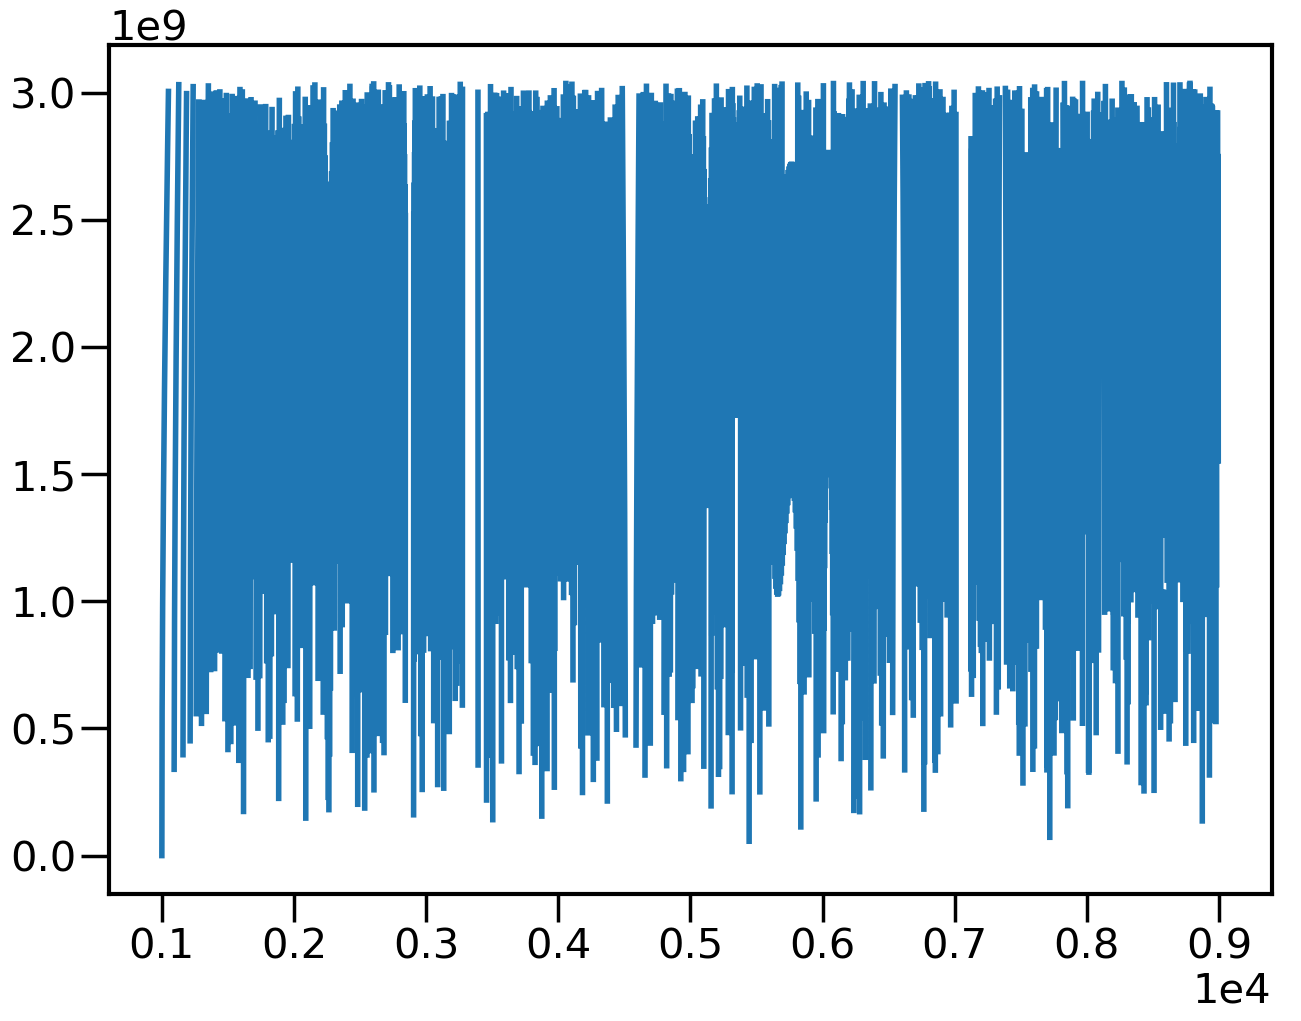

In [541]:
plot(j,aa)

In [597]:
def A_J(j,j2,j3,m2,m3):
    out=np.float64(j**2-(j2-j3)**2)**.5
    out*=((j2+j3+1)**2-j**2)**.5
    out*=(j**2-(m2+m3)**2)**.5
#     print(j,out)
#     x=out<0
#     out[x]=0
    return out

def B_J(j,j2,j3,m2,m3):
    out=np.float64((m2+m3)*(j2*(j2+1)-j3*(j3+1)))
    out-=(m2-m3)*j*(j+1)
    out*=2*j+1
    return out

def X_Np1(j,j2,j3,m2,m3): #X_n+1
    return j*A_J(j+1,j2,j3,m2,m3)

def X_N(j,j2,j3,m2,m3): #X_n+1
    return B_J(j,j2,j3,m2,m3)

def X_Nm1(j,j2,j3,m2,m3): #X_n+1
    return (j+1)*A_J(j,j2,j3,m2,m3)

In [611]:
def wig3j_recur(j1,j2,m1,m2,m3,j3_outmax=None):
    assert m3==-m1-m2
    
    j3_min=np.absolute(j1-j2)
    j3_max=j1+j2+1 #j3_max is j1+j2, +1 for 0 indexing
    j3=np.arange(j3_max)
    if j3_outmax is None:
        j3_outmax=j3_max
    else:
        j3_max=j3_outmax
    j3=j3[j3<=j3_outmax]#this can dangerious if we need to normalize. See below.
    
    wig_out=np.zeros_like(j3,dtype='float32')
#     wig_out2=np.zeros(j3_max)
    
    
    wig_out[j3_min]=1#wigner_3j(j1,j2,j3_min,m1,m2,m3)
    if j3_min==0:
        wig_out[j3_min]=wigner_3j(j1,j2,j3_min,m1,m2,m3)
        wig_out[j3_min+1]=wigner_3j(j1,j2,j3_min+1,m1,m2,m3) #not strictly needed when j3_min>0
    
#     wig_out2[j3_min]=wig_out[j3_min]
#     wig_out2[j3_min+1]=wig_out[j3_min+1]
    
    x_Np1=X_Np1(j3,j2,j1,m1,m2)*-1 #j==j3
    x_N=X_N(j3,j2,j1,m1,m2) #j==j3
    x_Nm1=X_Nm1(j3,j2,j1,m1,m2) #j==j3

    for i in np.arange(j3_min,j3_max):       
        if x_Np1[i]==0:
            if j3[i]==j3_min:
                print(i,wig_out[j3_min+1],wig_out[j3_min],x_N[i],x_Np1[i])
            continue
        wig_out[j3[i+1]]=x_Nm1[i]*wig_out[j3[i-1]]+x_N[i]*wig_out[j3[i]]
        wig_out[j3[i+1]]/=x_Np1[i]    
        if j3[i+1]==j3_min+1:
            print(i,j3_min,x_Np1[i],wig_out[j3[i+1]])
    
    N=np.sum((2*j3+1)*(wig_out**2))
    wig_out/=N**.5
    print('j3m',j3_min+1,wigner_3j(j1,j2,j3_min+1,m1,m2,m3).evalf()/wig_out[j3_min+1],N)
    
    
#     xxi=np.random.randint(j3_min+1,j3_max-1)
# #     print(xxi,j3_min+1,j3_max-1)    
#     wig_out2=wigner_3j(j1,j2,j3[xxi],m1,m2,m3).evalf()
#     print('test',xxi,wig_out[xxi],wig_out2,wig_out[xxi]/wig_out2)

#     print(np.all(np.isclose(wig_out,wig_out2)))
    return wig_out[:j3_outmax+1]

In [612]:
j1=31
j2=31
m1=2
m2=-2
m3=0
%time ww=wig3j_recur(j1,j2,m1,m2,m3,j3_outmax=None)

0 -0.008000256 -0.12598816 0.0 -0.0
j3m 1 0.999999823415489 0.9999996502734518
CPU times: user 0 ns, sys: 5.08 ms, total: 5.08 ms
Wall time: 4.43 ms


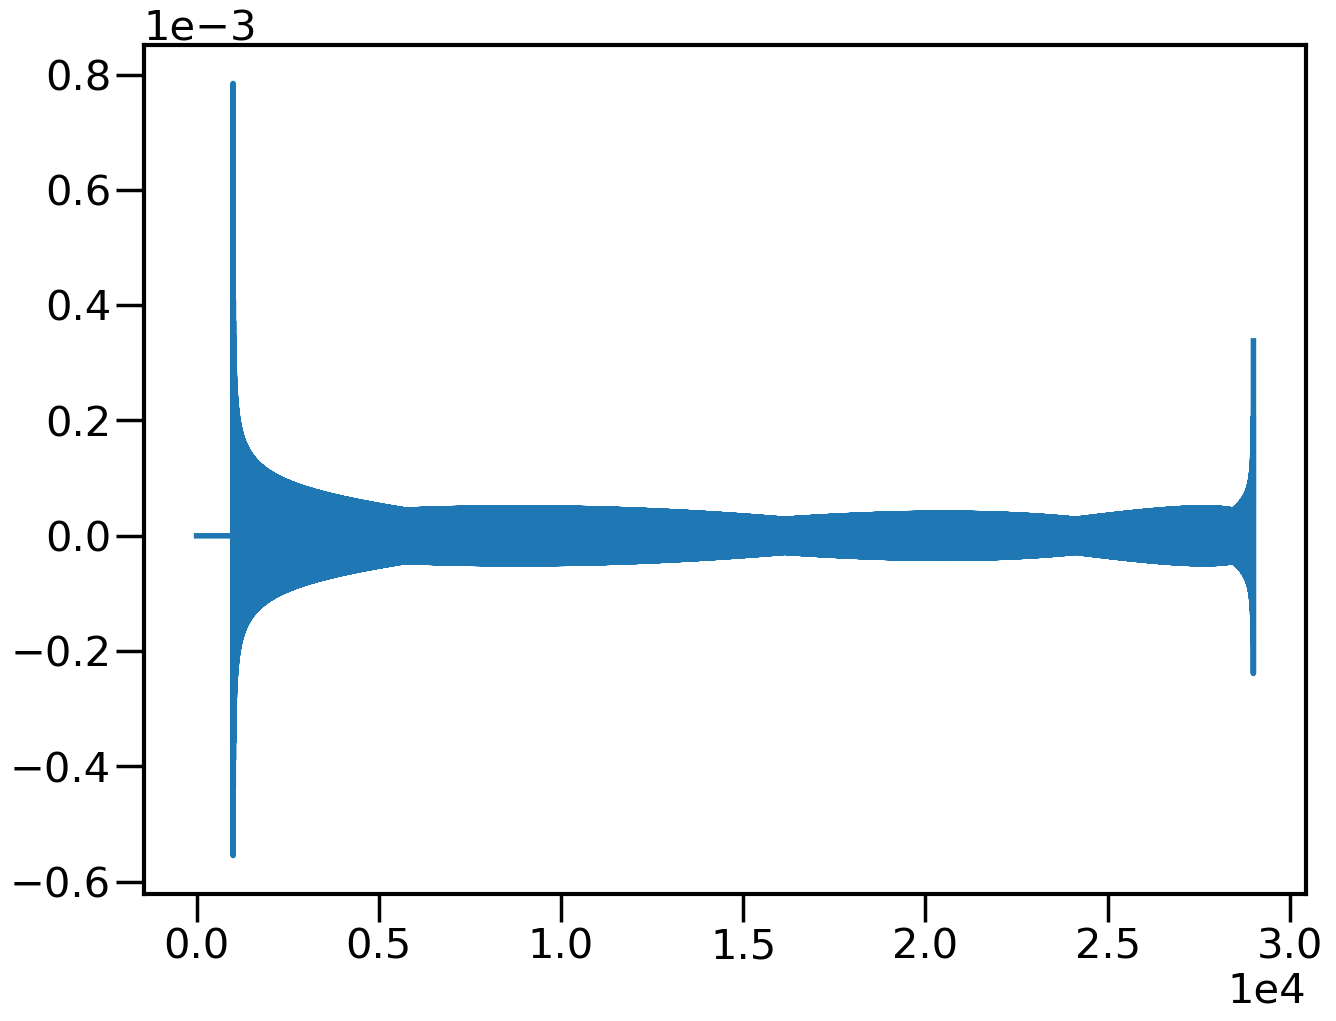

In [607]:
plot(np.arange(len(ww)),ww)
# xscale('log')
# xlim(1000,2000)

In [522]:
ww[2001]

-0.0

In [513]:
jj=2*np.arange(len(ww))+1
np.sum((jj*ww)**2)

47.06903053589171

In [508]:
0.0001857039

0.0001857039

In [1]:
from wigner_functions import *

In [2]:
??wigner_3j_000

In [613]:
l1=500
l2=500
l3=500
m1=0
m2=0
m3=0
%time dd=wigner_3j_000(l1,l2,l3,m1,m2,m3)

CPU times: user 47 µs, sys: 0 ns, total: 47 µs
Wall time: 49.8 µs


In [4]:
def C_m(j1,j2,j3,m1,m):
    out=(j2-m+1)*(j2+m)*(j3-m-m1+1)*(j3+m+m1)
    return out**0.5

def D_m(j1,j2,j3,m1,m):
    out=j2*(j2+1)+j3*(j3+1)-j1*(j1+1)-2*m*(m+m1)
    return out

def mj(j1,j2,j3): #X_n+1
    return (-1.)**(j1+j2+j3)


In [5]:
500*5001

2500500

In [209]:
def wig3j_recur_m(j1,j2,j3,m1,m2,m3):  #m1==0, m2==m, m3==-m1-m2
    assert m3==-m1-m2
        
    wig0=wigner_3j_000(j1,j2,j3,0,0,0)
    
    m2_t=0
    wig_mt={0:wig0}
    while m2_t<m2:
        X=C_m(j1,j2,j3,m1,m2_t+1) #j==j3
        Y=D_m(j1,j2,j3,m1,m2_t) #j==j3
        Z=C_m(j1,j2,j3,m1,m2_t) #j==j3
        if m2_t==0:
            mj_t=1#mj(j1,j2,j3)
#             if mj_t==-1:
#                 wig_m1=0
#             else:
            wig_m1=Y*wig_mt[0]/(X+mj_t*Z)
        else:
            wig_m1=Y*wig_mt[m2_t]+Z*wig_mt[m2_t-1]
            wig_m1/=X
        wig_m1*=-1
        wig_mt[m2_t+1]=wig_m1
        print
        m2_t+=1
    return wig_mt

In [322]:
def wig3j_recur_m_all(j1,j2,j3,m1,m2,m3):  #m1==0, m2==m, m3==-m1-m2
    assert m3==-m1-m2
        
    m_min=np.amax([-j2,-j3-m1])
    m_max=np.amin([j2,j3-m1])
    ms=np.arange(m_min,m_max+1)
    wig_mt=np.zeros_like(ms,dtype='float64')

    i=0
    Z=C_m(j1,j2,j3,m1,ms+1) #j==j3
    Y=D_m(j1,j2,j3,m1,ms) #j==j3
    X=C_m(j1,j2,j3,m1,ms) #j==j3
    
    R=np.zeros_like(ms,dtype='float64')
    S=np.zeros_like(ms,dtype='float64')
    S[0]=-X[0]/Y[0]
    R[-1]=-Z[-1]/Y[-1]
    nm=len(ms)
    mid_i=int(nm/2)
    for i in np.arange(len(ms)-1)+1:
        S[i]=-X[i]/(Y[i]+Z[i]*S[i-1])
        R[-1-i]=-Z[-1-i]/(Y[-1-i]+X[-1-i]*R[-i])
    print(mid_i,ms[mid_i],np.where(np.absolute(R)>10))
    wig_mt[mid_i]=1
    for i in np.arange(mid_i):
        wig_mt[mid_i+i+1]=wig_mt[mid_i+i]*R[mid_i+i+1]
        wig_mt[mid_i-i-1]=wig_mt[mid_i-i]*S[mid_i-i-1]
        
#     mid_i=int(nm/2)
#     print(S[mid_i],R[mid_i],ms[mid_i:],ms[:nm-mid_i])
#     R_sgn=np.sign(R) 
#     S_sgn=np.sign(S) 
#     R_prod=np.cumsum(R_sgn)*np.exp(np.cumsum(np.log(np.absolute(R))))
#     S_prod=np.cumsum(S_sgn)*np.exp(np.cumsum(np.log(np.absolute(S))))
    
#     wig_mt[mid_i:]=R_prod[mid_i:]
#     wig_mt[:nm-mid_i]=S_prod[mid_i:]

    N=(2*j1+1.)*np.sum(wig_mt**2)
    wig_mt/=N**.5

    if np.sign(wig_mt[-1])!=np.sign((-1)**(j2-j3-m1)):
        wig_mt*=1
    x=ms==0
    x+=ms==1
    x+=ms==2
    return wig_mt,wig_mt[x]

In [323]:
np.cumsum([1,1,2])

array([1, 2, 4])

In [324]:
%time oo2a,oo2=wig3j_recur_m_all(l1,l2,l3,0,2,-2)

500 0 (array([ 86, 106, 111, 118, 127, 169, 198, 205, 212, 229, 234, 239, 244,
       249, 275, 283, 291, 310, 335, 352, 375, 410, 413, 416, 419, 586,
       589, 592, 627, 650, 667, 681, 692, 711, 719, 727, 753, 758, 763,
       768, 773, 790, 797, 804, 811, 820, 833, 875, 884, 891, 896, 916]),)
CPU times: user 11.7 ms, sys: 0 ns, total: 11.7 ms
Wall time: 10.9 ms


In [614]:
l1=500
l2=500
l3=500
# l1=np.atleast_1d([500,400]).reshape(2,1,1)
# l2=np.atleast_1d([500,400]).reshape(1,2,1)
# l3=np.atleast_1d([500,400]).reshape(1,1,2)

%time oo=wig3j_recur_m(l1,l2,l3,0,2,-2)

CPU times: user 61 µs, sys: 0 ns, total: 61 µs
Wall time: 64.6 µs


In [615]:
np.sign([1,2,3])

array([1, 1, 1])

In [616]:
oo2

array([ 0.00178415, -0.00089692, -0.00088722])

In [617]:
oo

{0: 0.0012113105435186422,
 1: -0.0006056552717593211,
 2: -0.0006056649429786004}

In [295]:
wigner_3j(l1,l2,l3,0,0,0).evalf(),wigner_3j(l1,l2,l3,0,1,-1).evalf(),wigner_3j(l1,l2,l3,2,-2,0).evalf(),wigner_3j(l1,l2,l3,-2,2,0).evalf()

(0.00121131054351984,
 -0.000605655271759919,
 -0.000605664942979199,
 -0.000605664942979199)

In [296]:
wigner_3j(l1,l2,l3,0,0,0).evalf()/oo[0],wigner_3j(l1,l2,l3,0,1,-1).evalf()/oo[1],wigner_3j(l1,l2,l3,2,-2,0).evalf()/oo[2]

(1.00000000000099, 1.00000000000099, 1.00000000000099)

In [297]:
wigner_3j(l1,l2,l3,0,0,0).evalf()/oo2[0],wigner_3j(l1,l2,l3,0,1,-1).evalf()/oo2[1],wigner_3j(l1,l2,l3,2,-2,0).evalf()/oo2[2]

(0.711014179734234, 2.75783382942201, 0.367400579555754)

In [232]:
%time wigner_3j(l1,l2,l3,0,0,0).evalf()
%time wigner_3j(l1,l2,l3,0,1,-1).evalf()
%time wigner_3j(l1,l2,l3,0,2,-2).evalf()

CPU times: user 112 ms, sys: 0 ns, total: 112 ms
Wall time: 111 ms
CPU times: user 110 ms, sys: 2.2 ms, total: 112 ms
Wall time: 112 ms
CPU times: user 114 ms, sys: 0 ns, total: 114 ms
Wall time: 114 ms


-0.00122533824224421

In [621]:
l1=5000
l2=4000
l3=3000
m1=0
m2=0
m3=0
%time dd=wigner_3j_000(l1,l2,l3,m1,m2,m3)
%time dd2=wigner_3j(l1,l2,l3,0,0,0).evalf()
dd/dd2

CPU times: user 98 µs, sys: 1e+03 ns, total: 99 µs
Wall time: 105 µs
CPU times: user 1min 13s, sys: 50.1 ms, total: 1min 13s
Wall time: 1min 13s


1.00000000000409

In [622]:
dd/dd2


1.00000000000409